<h1>Intro and Data</h1>

In [1]:
import pandas as pd
import quandl as q
import pickle

df = q.get('WIKI/GOOG')
print(df.head())

               Open    High     Low   Close    Volume  Ex-Dividend  \
Date                                                                 
2014-03-27  568.000  568.00  552.92  558.46   13100.0          0.0   
2014-03-28  561.200  566.43  558.67  559.99   41100.0          0.0   
2014-03-31  566.890  567.00  556.93  556.97   10800.0          0.0   
2014-04-01  558.710  568.45  558.71  567.16    7900.0          0.0   
2014-04-02  565.106  604.83  562.19  567.00  146700.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2014-03-27          1.0    568.000     568.00    552.92      558.46   
2014-03-28          1.0    561.200     566.43    558.67      559.99   
2014-03-31          1.0    566.890     567.00    556.93      556.97   
2014-04-01          1.0    558.710     568.45    558.71      567.16   
2014-04-02          1.0    565.106     604.83    562.19      567.00   

           

<h1>Features and Labels</h1>

In [2]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [3]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0

In [4]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [5]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2014-03-27      558.46  2.727338   -1.679577      13100.0
2014-03-28      559.99  1.389013   -0.215609      41100.0
2014-03-31      556.97  1.808127   -1.749899      10800.0
2014-04-01      567.16  1.743302    1.512413       7900.0
2014-04-02      567.00  7.584624    0.335158     146700.0


<h1>Testing and Training</h1>

In [6]:
import numpy as np
import math
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [8]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [9]:
df.dropna(inplace=True)

In [10]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [11]:
X = preprocessing.scale(X) # -1 to 1 normalize data'

In [12]:
y = np.array(df['label'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # training and testing

In [14]:
# clf = svm.SVR() # Support Vector Regression

In [15]:
# clf.fit(X_train, y_train)

In [16]:
# confidence = clf.score(X_test, y_test)
# confidence

In [17]:
clf = LinearRegression(n_jobs=-1)
clf

LinearRegression(n_jobs=-1)

In [18]:
clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [19]:
confidence = clf.score(X_test, y_test)
confidence

0.9734387570210968

<h1>Forecasting and Predicting</h1>

In [22]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
forecast_set = clf.predict(X_lately)

In [23]:
print(forecast_set, confidence, forecast_out)

[1028.52331259 1047.3250213  1057.68764052 1058.4568094  1076.89881541
 1097.887796   1099.88177841 1111.4827307  1121.60297152 1117.0150811
 1135.27999118] 0.9734387570210968 11


In [24]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [25]:
style.use('ggplot')

In [26]:
df['Forecast'] = np.nan

In [27]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [28]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

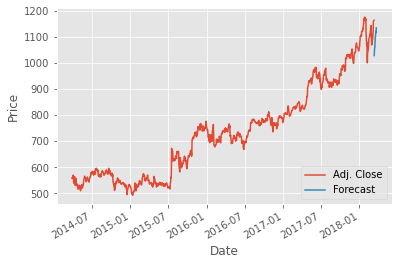

In [29]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<h1>Pickling and Scaling</h1>